# Actividad 19 - Datos con Pandas


### Utilizando los conceptos aprendidos en el módulo 19- Datos con pandas, se pide resolver los siguientes puntos:

    ● Instalar Pandas en Jupyter Notebook.
    ● Cargar un data frame desde un archivo csv.
    ● Cargar un data frame distinto desde un archivo Excel.
    ● Mostrar los datos de ambos dataframes.
    ● Instalar Pandas y Matplotlib.
    ● Realizar las siguientes acciones sobre el segundo dataframe:
    Group By sobre un campo y utilizando sum()
    Realizar un Melt
    ● Realizar un gráfico de Barras con el primer dataframe.

### Resolución

*Instalando pandas - Matpolotly - xlrd(para que pandas lea .xls y .xlsx)*

In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install xlrd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### *Trabajando con el .csv*

In [4]:
df_csv = pd.read_csv('Fuentes_Consumo_Energia.csv')
df_csv

,Entity,Code,Year,Coal_Consumption_EJ,Gas_Consumption_EJ,Geo_Biomass_Other_TWh,Hydro_Generation_TWh,Nuclear_Generation_TWh,Solar_Generation_TWh,Wind_Generation_TWh,Oil_Consumption_EJ
0,Africa,NaN,1965,1.164586,0.034358,0.000000,13.905635,0.000000,0.000000,0.000000,1.173241
1,Africa,NaN,1966,1.163240,0.038412,0.000000,15.510004,0.000000,0.000000,0.000000,1.284154
2,Africa,NaN,1967,1.189050,0.037964,0.000000,16.190636,0.000000,0.000000,0.000000,1.273799
3,Africa,NaN,1968,1.236646,0.038480,0.000000,18.938341,0.000000,0.000000,0.000000,1.344219
4,Africa,NaN,1969,1.247915,0.044971,0.000000,22.100890,0.000000,0.000000,0.000000,1.362729
...,...,...,...,...,...,...,...,...,...,...,...
5185,World,OWID_WRL,2015,157.838896,125.208335,538.277477,3884.619692,2575.763561,256.838045,831.567439,183.210968
5186,World,OWID_WRL,2016,155.504177,128.124027,547.865908,4012.947981,2614.905286,328.237428,963.774036,186.912413
5187,World,OWID_WRL,2017,156.094106,131.708206,582.893132,4065.869592,2638.554157,446.946764,1140.971268,189.242920
5188,World,OWID_WRL,2018,158.793935,138.659832,615.038237,4171.404951,2700.373917,582.754345,1270.164880,191.451896


In [5]:
# Voy a usar cierta columnas para poder hacer calculos posteriores
df_csv = df_csv[['Entity', 'Year', 'Coal_Consumption_EJ', 'Gas_Consumption_EJ', 'Oil_Consumption_EJ']]
df_csv

,Entity,Year,Coal_Consumption_EJ,Gas_Consumption_EJ,Oil_Consumption_EJ
0,Africa,1965,1.164586,0.034358,1.173241
1,Africa,1966,1.163240,0.038412,1.284154
2,Africa,1967,1.189050,0.037964,1.273799
3,Africa,1968,1.236646,0.038480,1.344219
4,Africa,1969,1.247915,0.044971,1.362729
...,...,...,...,...,...
5185,World,2015,157.838896,125.208335,183.210968
5186,World,2016,155.504177,128.124027,186.912413
5187,World,2017,156.094106,131.708206,189.242920
5188,World,2018,158.793935,138.659832,191.451896


**Analisis explaratorio de datos básico**

In [6]:
# Descripción general del dataframe
df_csv.describe()

,Year,Coal_Consumption_EJ,Gas_Consumption_EJ,Oil_Consumption_EJ
count,5190.000000,5170.000000,5170.000000,5184.000000
mean,1992.823699,3.220641,2.396150,4.456855
std,15.747169,13.681293,9.383618,16.324680
min,1965.000000,0.000000,0.000000,0.000000
25%,1979.000000,0.008535,0.028308,0.243499
50%,1993.000000,0.114435,0.186077,0.555215
75%,2006.000000,0.720752,0.933519,1.844076
max,2019.000000,161.976352,141.452770,193.031574


In [7]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               5190 non-null   object 
 1   Year                 5190 non-null   int64  
 2   Coal_Consumption_EJ  5170 non-null   float64
 3   Gas_Consumption_EJ   5170 non-null   float64
 4   Oil_Consumption_EJ   5184 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 202.9+ KB


In [15]:
df_csv.isnull().count()

Entity                 5190
Year                   5190
Coal_Consumption_EJ    5190
Gas_Consumption_EJ     5190
Oil_Consumption_EJ     5190
dtype: int64

In [16]:
# Agrupando por entidad y año la cantidad de consumo en ExaJulio
df_agrupado = df_csv.groupby(['Entity', 'Year'], as_index=False)['Oil_Consumption_EJ'].sum()
df_agrupado

,Entity,Year,Oil_Consumption_EJ
0,Africa,1965,1.173241
1,Africa,1966,1.284154
2,Africa,1967,1.273799
3,Africa,1968,1.344219
4,Africa,1969,1.362729
...,...,...,...
5185,World,2015,183.210968
5186,World,2016,186.912413
5187,World,2017,189.242920
5188,World,2018,191.451896


In [18]:
# Agrupando por entidad y año la cantidad de consumo en ExaJulio
df_agrupado2 = df_csv.groupby('Entity', as_index=False)['Oil_Consumption_EJ'].sum()
df_agrupado2

,Entity,Oil_Consumption_EJ
0,Africa,243.732572
1,Algeria,21.544921
2,Argentina,54.830449
3,Asia Pacific,1946.871062
4,Australia,82.953221
...,...,...
95,Uzbekistan,9.776168
96,Venezuela,50.806057
97,Vietnam,18.961446
98,Western Africa,39.611454


In [17]:
# Haciendo un melt sobre las columnas entity y Coal_Consumption_EJ, Gas_Consumption_EJ,Oil_Consumption_EJ
df_csv_melt = pd.melt(df_csv, id_vars='Entity', value_vars=['Coal_Consumption_EJ', 'Gas_Consumption_EJ',
'Oil_Consumption_EJ'])
df_csv_melt

,Entity,variable,value
0,Africa,Coal_Consumption_EJ,1.164586
1,Africa,Coal_Consumption_EJ,1.163240
2,Africa,Coal_Consumption_EJ,1.189050
3,Africa,Coal_Consumption_EJ,1.236646
4,Africa,Coal_Consumption_EJ,1.247915
...,...,...,...
15565,World,Oil_Consumption_EJ,183.210968
15566,World,Oil_Consumption_EJ,186.912413
15567,World,Oil_Consumption_EJ,189.242920
15568,World,Oil_Consumption_EJ,191.451896


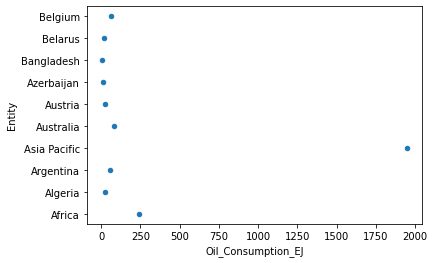

In [47]:
# Graficando df_agrupado2
df_agrupado2.head(10).plot(x='Oil_Consumption_EJ', y='Entity', kind='scatter')
plt.show()
plt.close()


### *Trabajando con el excel*

In [23]:
df_excel = pd.read_excel('Comisiones.xlsx')
df_excel

,CodigoEmpleado,IdSucursal,Apellido_y_Nombre,Sucursal,Anio,Mes,Porcentaje
0,3032,26,"Rico, Julieta",Córdoba Quiroz,2019,9,11
1,3032,26,"Rico, Julieta",Córdoba Quiroz,2019,10,18
2,3032,26,"Rico, Julieta",Córdoba Quiroz,2019,1,7
3,3032,26,"Rico, Julieta",Córdoba Quiroz,2019,11,7
4,3032,26,"Rico, Julieta",Córdoba Quiroz,2019,3,8
...,...,...,...,...,...,...,...
218,3975,26,"Villamizar, Monica",Córdoba Quiroz,2020,7,15
219,3975,26,"Villamizar, Monica",Córdoba Quiroz,2020,8,19
220,3975,26,"Villamizar, Monica",Córdoba Quiroz,2020,9,15
221,3975,26,"Villamizar, Monica",Córdoba Quiroz,2020,11,11


In [24]:
# Explorando un poco
df_excel.describe()

,CodigoEmpleado,IdSucursal,Anio,Mes,Porcentaje
count,223.000000,223.0,223.000000,223.000000,223.000000
mean,3499.820628,26.0,2019.520179,6.600897,12.017937
std,335.785799,0.0,0.500717,3.457255,4.225581
min,3032.000000,26.0,2019.000000,1.000000,5.000000
25%,3193.000000,26.0,2019.000000,4.000000,9.000000
50%,3455.000000,26.0,2020.000000,7.000000,12.000000
75%,3822.000000,26.0,2020.000000,10.000000,15.000000
max,3975.000000,26.0,2020.000000,12.000000,20.000000


In [29]:
df_excel.dtypes

CodigoEmpleado        int64
IdSucursal            int64
Apellido_y_Nombre    object
Sucursal             object
Anio                  int64
Mes                   int64
Porcentaje            int64
dtype: object

In [34]:
# Columnna codigoempleado no tiene na o nulls
df_excel.CodigoEmpleado.isna().count()

223

In [39]:
# Agrupando el df,  cantidad de personas para cada empleado
df_excel_agrup = df_excel.groupby('CodigoEmpleado', as_index=False)[['Apellido_y_Nombre']].count()
df_excel_agrup

,CodigoEmpleado,Apellido_y_Nombre
0,3032,23
1,3118,21
2,3144,5
3,3193,24
4,3230,23
5,3455,23
6,3671,6
7,3714,5
8,3812,22
9,3822,22


In [40]:
# Usando melt
pd.melt(df_excel, id_vars='CodigoEmpleado', value_vars=['Apellido_y_Nombre', 'Sucursal','Anio'])

,CodigoEmpleado,variable,value
0,3032,Apellido_y_Nombre,"Rico, Julieta"
1,3032,Apellido_y_Nombre,"Rico, Julieta"
2,3032,Apellido_y_Nombre,"Rico, Julieta"
3,3032,Apellido_y_Nombre,"Rico, Julieta"
4,3032,Apellido_y_Nombre,"Rico, Julieta"
...,...,...,...
664,3975,Anio,2020
665,3975,Anio,2020
666,3975,Anio,2020
667,3975,Anio,2020


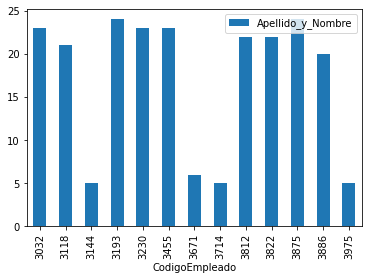

In [48]:
# Graficando df_excel_agrup, cantidad de personas para cada empleado
df_excel_agrup.plot(x='CodigoEmpleado', y='Apellido_y_Nombre', kind='bar')
plt.title = 'Hola'
plt.show()
plt.close()